In [1]:
from os import listdir,getcwd
from os.path import isfile, join
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
%matplotlib inline
# import matplotlib as plt

input_dir = './input/'
# listdir('./input')
tech_columns = (['Metric', 'Region type', 'Regions', 'Date','Month'])

In [2]:
files_ua = [f for f in listdir(input_dir) if isfile(join(input_dir, f)) and "UA" in f]
files = [f for f in listdir(input_dir) if isfile(join(input_dir, f)) and 'TV' not in f]
print(files)

['P3M Appliances purchase.csv', 'P3M Appliances Sale.csv', 'P3M Autos sale.csv', 'P3M Cars purchase.csv', 'P3M General purchase.csv', 'P3M General sales.csv', 'P3M Jobs finding.csv', 'P3M Jobs offering.csv', 'Traffic Daily.csv', 'UA Appliances purchase.csv', 'UA Appliances Sale.csv', 'UA Autos sale.csv', 'UA Cars purchase.csv', 'UA General purchase.csv', 'UA General sales.csv', 'UA Jobs finding.csv', 'UA Jobs offering.csv', 'UP Appliances purchase.csv', 'UP Appliances Sale.csv', 'UP Autos sale.csv', 'UP Cars purchase.csv', 'UP General purchase.csv', 'UP General sales.csv', 'UP Jobs finding.csv', 'UP Jobs offering.csv', 'UTOM Appliances purchase.csv', 'UTOM Appliances Sale.csv', 'UTOM Autos sale.csv', 'UTOM Cars purchase.csv', 'UTOM General purchase.csv', 'UTOM General sales.csv', 'UTOM Jobs finding.csv', 'UTOM Jobs offering.csv']


In [3]:
data = pd.read_csv(input_dir+files_ua[0],sep = ';',decimal = ',')

In [36]:
data.describe()

mvideo.ru  eldorado.ru  dns-shop.ru    ozon.ru  mediamarkt.ru  \
count  71.000000    71.000000    71.000000  71.000000      71.000000   
mean    0.519268     0.507423     0.134775   0.101901       0.168958   
std     0.078085     0.056126     0.106714   0.035798       0.076829   
min     0.363000     0.372000     0.006000   0.020000       0.022000   
25%     0.464000     0.476500     0.041500   0.078000       0.117500   
50%     0.517000     0.506000     0.116000   0.099000       0.161000   
75%     0.573000     0.547500     0.204000   0.130500       0.237500   
max     0.678000     0.645000     0.441000   0.177000       0.298000   

        avito.ru  ulmart.ru  holodilnik.ru  tehnosila.ru  aliexpress.com  \
count  71.000000  71.000000      71.000000     71.000000       71.000000   
mean    0.120746   0.190789       0.120662      0.130746        0.074986   
std     0.044815   0.169308       0.079434      0.051439        0.032378   
min     0.035000   0.000000       0.009000      0.028000        0.013000   
25%     0.084500   0.102000       0.051000      0.094500        0.051500   
50%     0.118000   0.140000       0.103000      0.134000        0.074000   
75%     0.150500   0.180500       0.185000      0.172000        0.099000   
max     0.266000   0.591000       0.289000      0.261000        0.143000   

       citilink.ru      youla  
count    71.000000  71.000000  
mean      0.088056   0.024676  
std       0.042573   0.020945  
min       0.000000   0.000000  
25%       0.069000   0.003500  
50%       0.090000   0.026000  
75%       0.111500   0.037000  
max       0.182000   0.087000

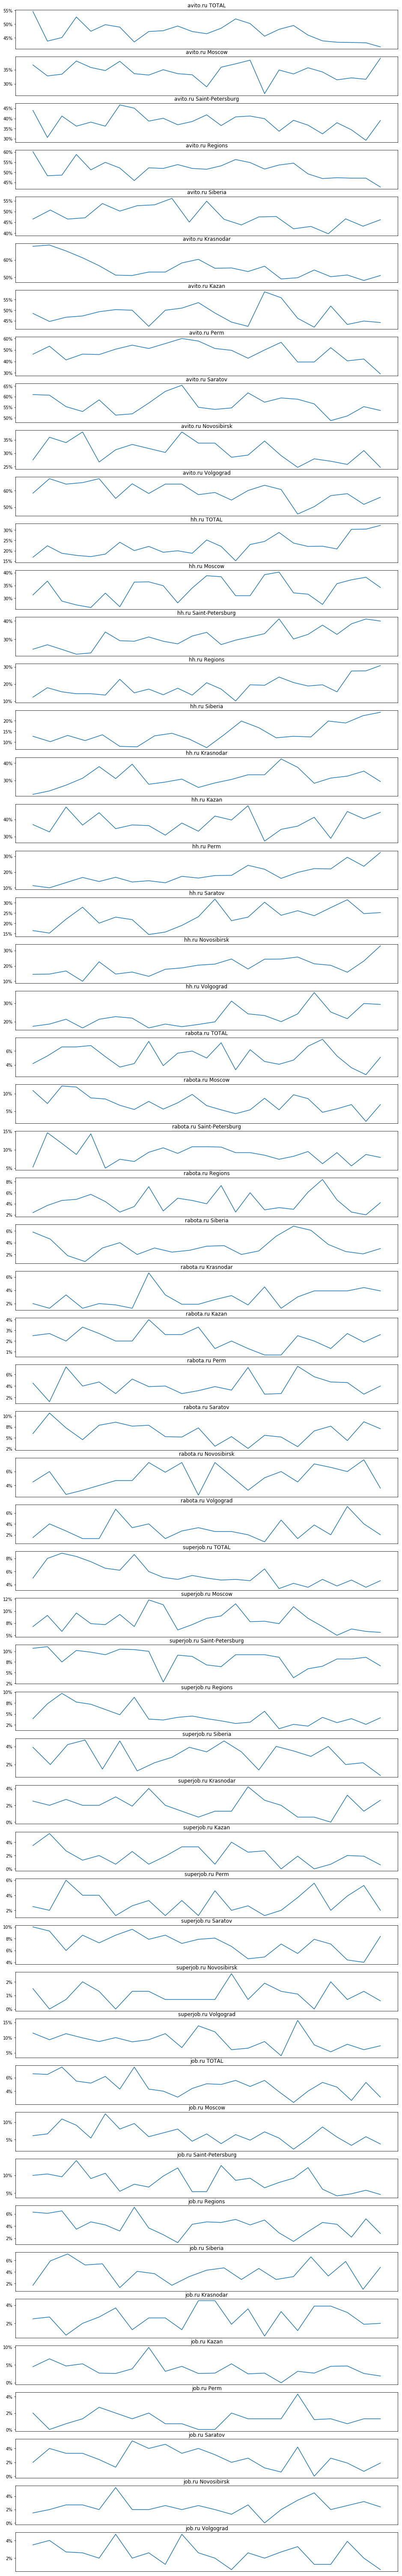

In [87]:
from matplotlib.ticker import FuncFormatter
import matplotlib.gridspec as gridspec
regions = data['Regions'].unique()
site_list = data.columns[data.columns.isin(tech_columns)==False]
index = 0
graph_num = len(regions)*len(site_list)
col_num = 3
plt.rcParams['figure.figsize'] = (16.0, graph_num*2)
gs = gridspec.GridSpec(graph_num // col_num + 1, col_num)
gs.update(hspace=0.4)
for site in site_list:
    for region in regions:
        index += 1
        plt.subplot(graph_num, 1, index)
        plt.plot(data[data['Regions'] == region][site])
        plt.title(site+" "+region)
#         plt.axis('off')
        plt.gca().axes.get_xaxis().set_visible(False)
        plt.gca().axes.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
        
plt.savefig('1.png')

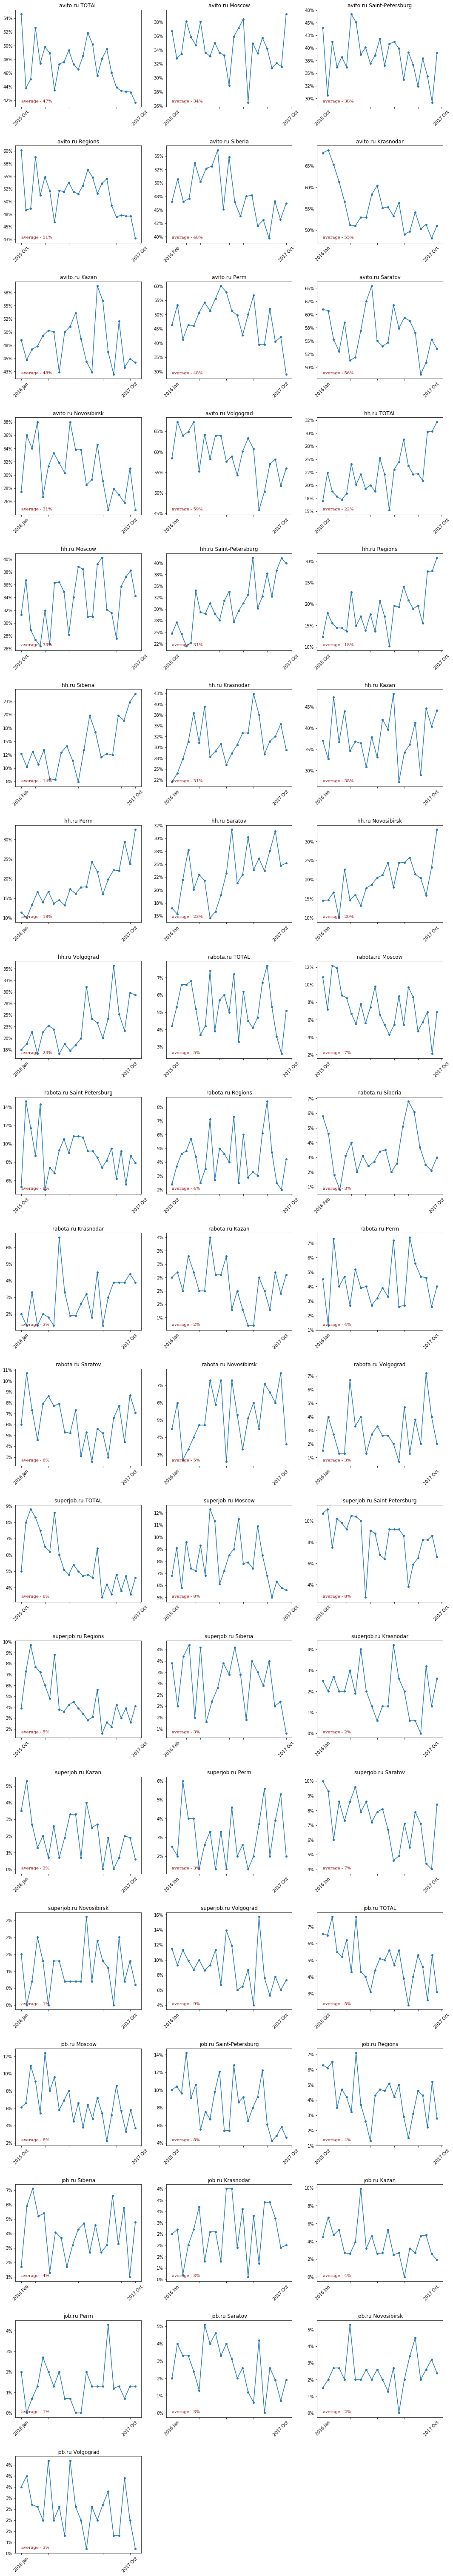

In [149]:
from matplotlib.ticker import FuncFormatter
import matplotlib.gridspec as gridspec
plt.close()
regions = data['Regions'].unique()
site_list = data.columns[data.columns.isin(tech_columns)==False]
index = 0
graph_num = len(regions)*len(site_list)
col_num = 3
# plt.rcParams['figure.figsize'] = (16.0, graph_num*2)
figsize = (18.0, graph_num*2)
gs = gridspec.GridSpec(graph_num // col_num + 1, col_num)
gs.update(hspace=0.4)
fig1 = plt.figure(num=1, figsize=figsize)
ax = []
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 10,
        }
for site in site_list:
    for region in regions:
        row = (index // col_num)
        col = index % col_num
        plot_data = data[data['Regions'] == region][site]
        ax.append(fig1.add_subplot(gs[row, col]))
        ax[-1].set_title(site+" "+region)
        
        ax[-1].plot(range(len(plot_data)),plot_data,  'o', ls='-', ms=4)
        ax[-1].axes.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
#         plt.subplot(graph_num, 1, index)
#         plt.plot(data[data['Regions'] == region][site])
#         plt.title(site+" "+region)
#         plt.axis('off')
#         plt.gca().axes.get_xaxis().set_visible(False)
#         plt.gca().axes.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
        index+=1
        ax[-1].text(0, min(plot_data), 'average - {:.0%}'.format(np.mean(plot_data)) , fontdict=font)
        labels = ([item.get_text() for item in ax[-1].axes.get_xticklabels()]).copy()
        labels[1] = (data[data['Regions'] == region]['Date'].iloc[0]).replace('_',' ')
        labels[-2] = (data[data['Regions'] == region]['Date'].iloc[-1]).replace('_',' ')
        ax[-1].set_xticklabels(labels,minor=False, rotation=45)
plt.savefig('1.png',replace = True)

In [ ]:
def plot_data(data,tech_columns,category_name,output_folder = ''):
    ''' Plot data from file. Make single subplot for every site and every region
        
        Input:  data - data from file
                tech_columns - columns with technical information, will not be plotted
                category_name - will be passed to output file name
                output_folder - place where plot will be saved
    '''
    plt.close()
    regions = data['Regions'].unique()
    site_list = data.columns[data.columns.isin(tech_columns)==False]
    index = 0
    graph_num = len(regions)*len(site_list)
    col_num = 3
    figsize = (18.0, graph_num*2)
    gs = gridspec.GridSpec(graph_num // col_num + 1, col_num)
    gs.update(hspace=0.4)
    fig1 = plt.figure(num=1, figsize=figsize)
    ax = []
    font = {'family': 'serif',
            'color':  'darkred',
            'weight': 'normal',
            'size': 10,
            }
    for site in site_list:
        for region in regions:
            row = (index // col_num)
            col = index % col_num
            plot_data = data[data['Regions'] == region][site]
            ax.append(fig1.add_subplot(gs[row, col]))
            ax[-1].set_title(site+" "+region)
            ax[-1].plot(range(len(plot_data)),plot_data,  'o', ls='-', ms=4)
            ax[-1].axes.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
            ax[-1].text(0, min(plot_data), 'average - {:.0%}'.format(np.mean(plot_data)) , fontdict=font)
            index+=1
            labels = ([item.get_text() for item in ax[-1].axes.get_xticklabels()]).copy()
            labels[1] = (data[data['Regions'] == region]['Date'].iloc[0]).replace('_',' ')
            labels[-2] = (data[data['Regions'] == region]['Date'].iloc[-1]).replace('_',' ')
            ax[-1].set_xticklabels(labels,minor=False, rotation=45)

    plt.savefig(output_folder+category_name+'.png',replace = True)

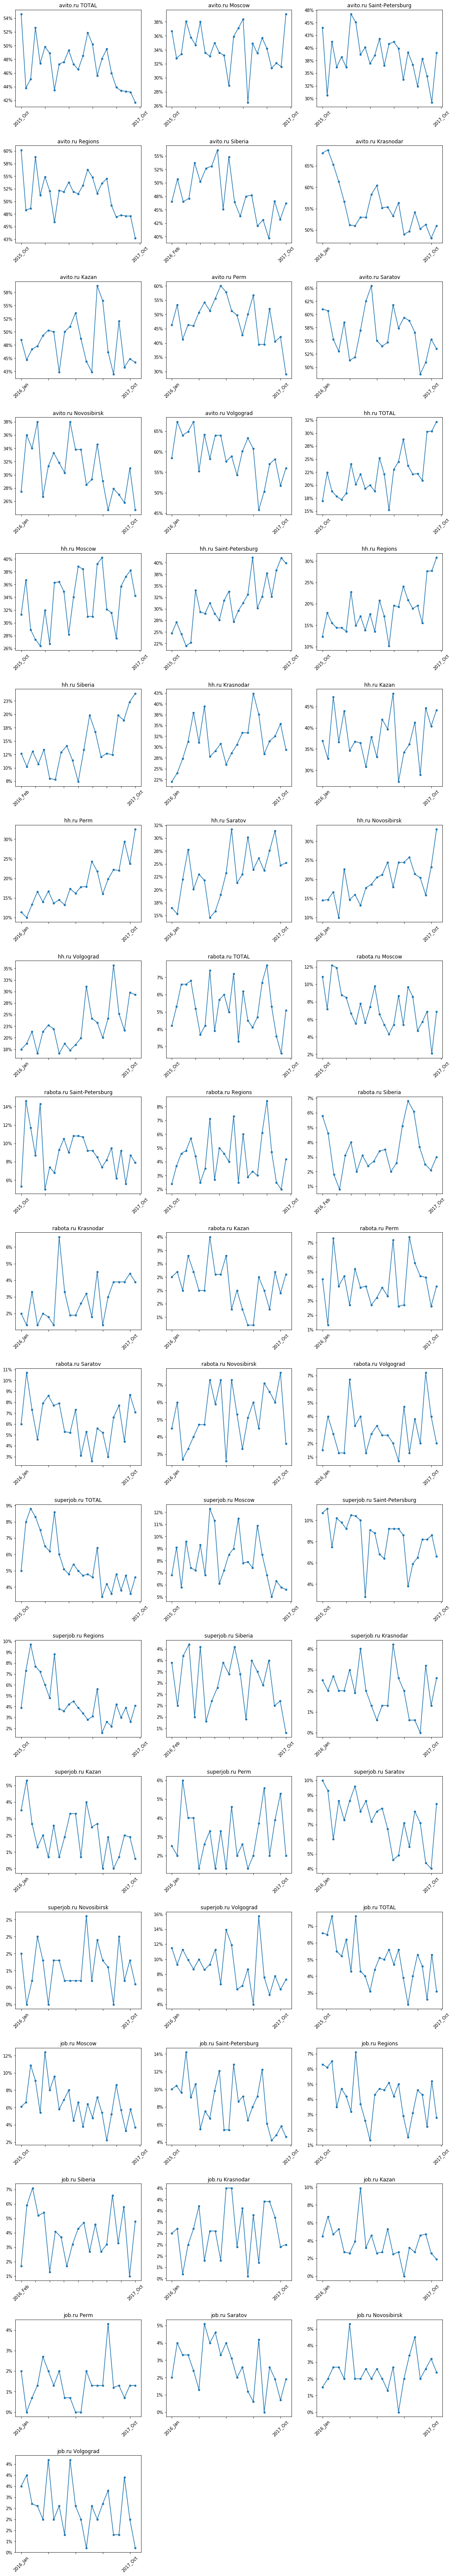

In [142]:
plot_data(data,tech_columns,'1','./output/category_viz/')

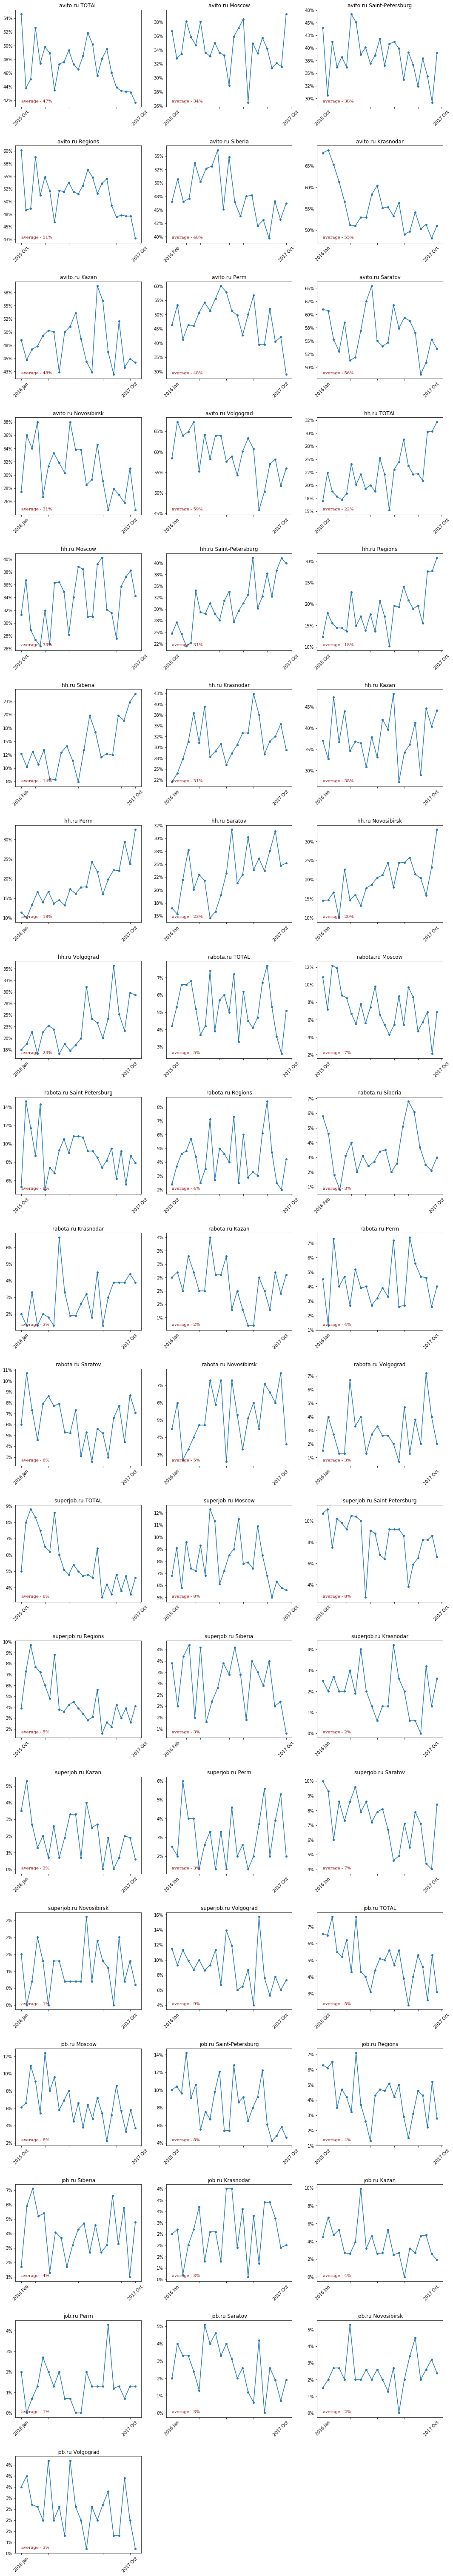

In [153]:
for file in files:
    data = pd.read_csv(input_dir+file,sep = ';',decimal = ',')
    plot_data(data,tech_columns,file[:-4],'./output/category_viz/')

In [167]:
tv_nat = pd.read_csv('./input/TV Nat.csv', sep = ';', decimal = ',')
tv_nat.sort_values(by = ['Category','Brand','Date'],inplace = True)

In [165]:
tv_nat.sort_values(by = ['Category','Brand','Date'],inplace = True)

In [249]:
traffic_daily = pd.read_csv('./input/Traffic Daily.csv', sep = ';', decimal = ',')
traffic_daily.describe()
# traffic_daily.sort_values('Day of event_date',inplace = True)

Page View Any  Page View Auto  Page View General  Page View Jobs  \
count   1.790000e+02    1.790000e+02       1.790000e+02    1.790000e+02   
mean    3.133833e+08    7.715584e+07       9.368561e+07    1.655453e+07   
std     3.143898e+07    5.316454e+06       1.105398e+07    3.748846e+06   
min     2.353383e+08    6.262581e+07       6.853497e+07    9.741999e+06   
25%     2.917234e+08    7.383009e+07       8.516976e+07    1.294068e+07   
50%     3.129210e+08    7.746163e+07       9.426379e+07    1.689890e+07   
75%     3.371517e+08    8.135533e+07       1.026384e+08    1.962325e+07   
max     3.794884e+08    8.839147e+07       1.189394e+08    2.380762e+07   

       Page View Real Estate  Page View Services  Page View Undefined  \
count           1.790000e+02        1.790000e+02         1.790000e+02   
mean            4.208528e+07        3.672658e+06         8.023022e+07   
std             3.663230e+06        4.786073e+05         1.023799e+07   
min             3.281190e+07        2.737753e+06         5.727546e+07   
25%             3.989339e+07        3.243576e+06         7.348613e+07   
50%             4.259730e+07        3.778886e+06         7.933778e+07   
75%             4.487908e+07        4.009322e+06         8.774034e+07   
max             4.818757e+07        4.893594e+06         1.023164e+08   

       unique_visitors Any  unique_visitors Auto  unique_visitors General  \
count         1.790000e+02          1.790000e+02             1.790000e+02   
mean          1.052687e+07          3.019602e+06             4.926665e+06   
std           9.352325e+05          1.955068e+05             4.666042e+05   
min           8.251925e+06          2.511223e+06             3.788109e+06   
25%           9.936630e+06          2.892650e+06             4.639161e+06   
50%           1.069116e+07          3.047828e+06             4.907891e+06   
75%           1.118198e+07          3.162473e+06             5.266939e+06   
max           1.234767e+07          3.414287e+06             5.906237e+06   

       unique_visitors Jobs  unique_visitors Real Estate  \
count          1.790000e+02                 1.790000e+02   
mean           1.173375e+06                 2.385374e+06   
std            1.967526e+05                 2.067700e+05   
min            7.769520e+05                 1.867922e+06   
25%            1.009498e+06                 2.228726e+06   
50%            1.207020e+06                 2.423170e+06   
75%            1.326477e+06                 2.543250e+06   
max            1.618781e+06                 2.750661e+06   

       unique_visitors Services  unique_visitors Undefined         GRP  \
count                179.000000               1.790000e+02  179.000000   
mean              673545.519553               1.010845e+07   27.701899   
std                70916.315308               1.305087e+06   29.382601   
min               503184.000000               6.631883e+06    0.000000   
25%               616909.500000               9.308506e+06    0.000000   
50%               692279.000000               1.037367e+07   21.290000   
75%               724600.000000               1.105255e+07   54.730000   
max               834545.000000               1.239992e+07  106.110000   

            GRP30  
count  179.000000  
mean    15.296425  
std     18.976464  
min      0.000000  
25%      0.000000  
50%      8.040000  
75%     24.665000  
max     75.730000

In [224]:
traffic_daily.index

RangeIndex(start=0, stop=179, step=1)

In [255]:
traffic_daily['week_num'] = traffic_daily.index//7+1
traffic_daily_agg = traffic_daily.groupby(traffic_daily.columns[-1]).sum()
first_date = traffic_daily['Day of event_date'].iloc[0]
start_date = traffic_daily['Day of event_date'].iloc[-1]

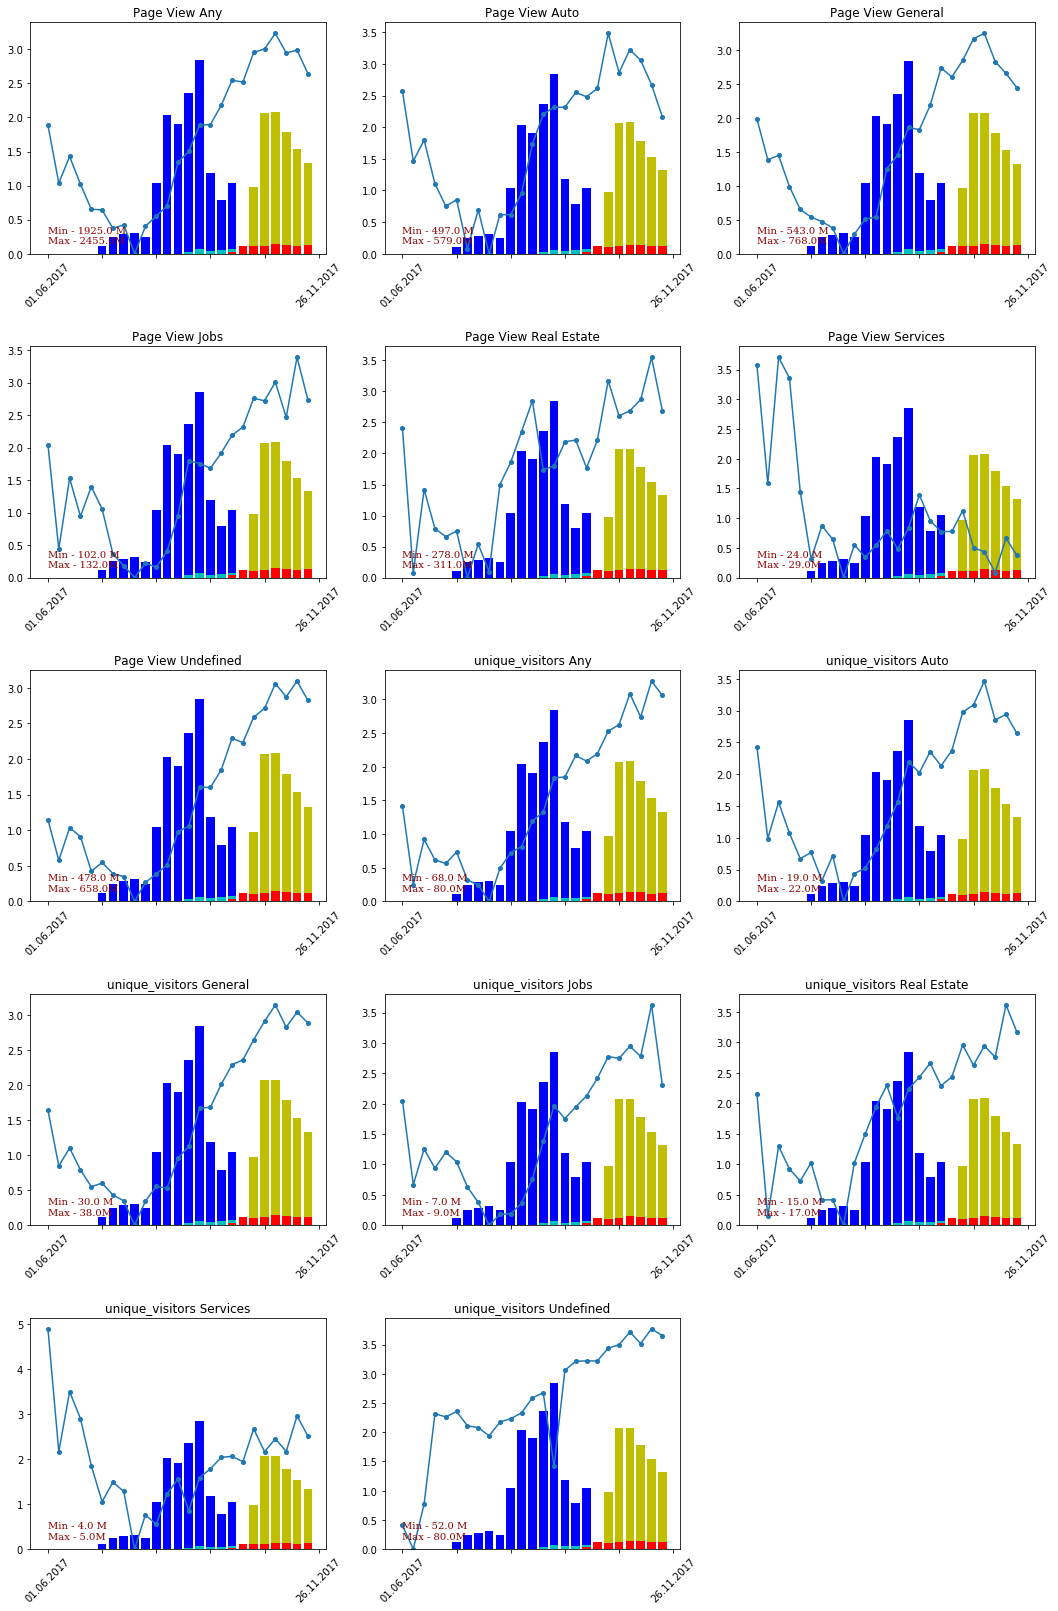

In [22]:
plt.close()
traffic_daily = pd.read_csv('./input/Traffic Daily.csv', sep = ';', decimal = ',')
traffic_daily['week_num'] = traffic_daily.index//7+1
traffic_daily_agg = traffic_daily.groupby(traffic_daily.columns[-1]).sum()
first_date = traffic_daily['Day of event_date'].iloc[0]
start_date = traffic_daily['Day of event_date'].iloc[-1]
index = 0
data = traffic_daily_agg
graph_num = data.shape[1]-1
excluding_fields = ['GRP Auto','GRP General','GRP Job','GRP Services','GRP Real estate / Site'
                    ,'Day of event_date','GRP','GRP30','week_num']
tv_metric_fields = ['GRP Auto','GRP General','GRP Job','GRP Services','GRP Real estate / Site']
metric_list = data.columns[data.columns.isin(excluding_fields)==False]
col_num = 3
figsize = (18.0, graph_num*2)
gs = gridspec.GridSpec(graph_num // col_num + 1, col_num)
gs.update(hspace=0.4)
fig1 = plt.figure(num=1, figsize=figsize)
ax = []
color_list = ['y','b','g','c','r']
tv_data = data['GRP'][:-1]
tv_data_corr = np.std(tv_data)
for metric in metric_list:
    row = (index // col_num)
    col = index % col_num
    plot_data = data[metric][:-1]
    min_plot = np.min(plot_data)
    max_plot = np.max(plot_data)
    plot_data = (plot_data-min_plot)/(np.std(plot_data))
    ax.append(fig1.add_subplot(gs[row, col]))
    ax[-1].set_title(metric)
    ax[-1].plot(range(len(plot_data)),plot_data,  'o', ls='-', ms=4)
#     ax[-1].plot(range(len(plot_data)),plot_data,  'o', ls='-', ms=4,co)
    col_index = 0
    color_list
    for tv_metric in tv_metric_fields:
        tv_data = data[tv_metric][:-1]
        tv_data /= tv_data_corr
        ax[-1].bar(range(len(tv_data)),tv_data,color = color_list[col_index])
        col_index+=1
#     ax[-1].axes.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax[-1].text(0, min(plot_data), str('Min - '+str(min_plot//1e6)+' M\nMax - '+str(max_plot//1e6)+'M\n') , fontdict=font)
    index+=1
    labels = ([item.get_text() for item in ax[-1].axes.get_xticklabels()]).copy()
    labels[1] = first_date
    labels[-2] = start_date
    ax[-1].set_xticklabels(labels,minor=False, rotation=45)
# plt.legend()
plt.savefig('./output/category_viz/'+'Category'+'.png',replace = True)

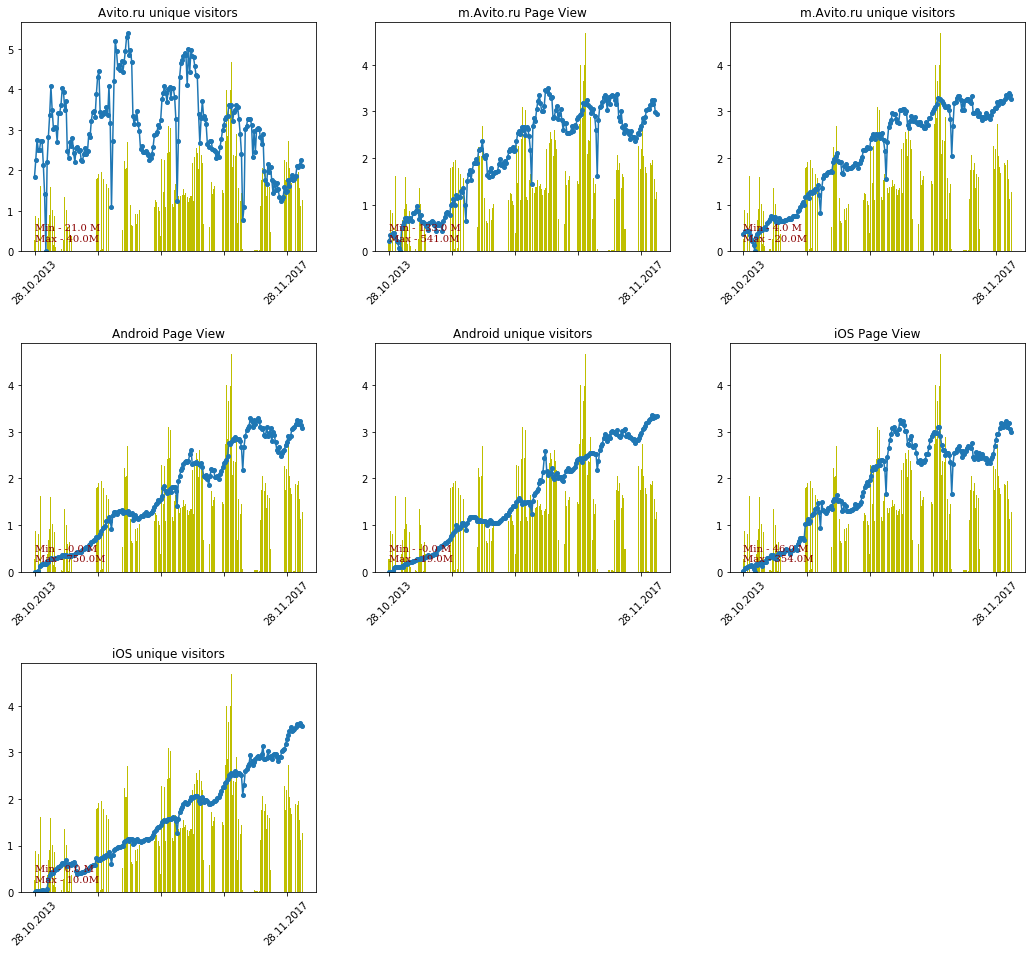

In [11]:
plt.close()
traffic_daily = pd.read_csv('./input/Traffic Daily v2.csv', sep = ';', decimal = ',')
traffic_daily['week_num'] = traffic_daily.index//7+1
traffic_daily_agg = traffic_daily.groupby(traffic_daily.columns[-1]).sum()
first_date = traffic_daily['Day'].iloc[0]
start_date = traffic_daily['Day'].iloc[-1]
index = 0
font = {'family': 'serif',
            'color':  'darkred',
            'weight': 'normal',
            'size': 10,
            }
data = traffic_daily_agg
graph_num = data.shape[1]-1
metric_list = data.columns[data.columns.isin(['Day','GRP','GRP30','week_num'])==False]
col_num = 3
figsize = (18.0, graph_num*2)
gs = gridspec.GridSpec(graph_num // col_num + 1, col_num)
gs.update(hspace=0.4)
fig1 = plt.figure(num=1, figsize=figsize)
ax = []
tv_data = data['GRP'][:-1]
tv_data /= np.std(tv_data)
for metric in metric_list:
    row = (index // col_num)
    col = index % col_num
    plot_data = data[metric][:-1]
    min_plot = np.min(plot_data)
    max_plot = np.max(plot_data)
    plot_data = (plot_data-min_plot)/(np.std(plot_data))
    ax.append(fig1.add_subplot(gs[row, col]))
    ax[-1].set_title(metric)
    ax[-1].plot(range(len(plot_data)),plot_data,  'o', ls='-', ms=4)
#     ax[-1].plot(range(len(plot_data)),plot_data,  'o', ls='-', ms=4,co)
    ax[-1].bar(range(len(tv_data)),tv_data,color = 'y')
#     ax[-1].axes.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax[-1].text(0, min(plot_data), str('Min - '+str(min_plot//1e6)+' M\nMax - '+str(max_plot//1e6)+'M\n') , fontdict=font)
    index+=1
    labels = ([item.get_text() for item in ax[-1].axes.get_xticklabels()]).copy()
    labels[1] = first_date
    labels[-2] = start_date
    ax[-1].set_xticklabels(labels,minor=False, rotation=45)
plt.savefig('./output/category_viz/'+'Platform'+'.png',replace = True)

In [63]:
traffic_daily = pd.read_csv('./input/Traffic Daily v2.csv', sep = ';', decimal = ',')
traffic_daily['week_num'] = traffic_daily.index//7+1
traffic_daily_agg = traffic_daily.groupby(traffic_daily.columns[-1]).sum()
first_date = traffic_daily['Day'].iloc[0]
start_date = traffic_daily['Day'].iloc[-1]
index = 0
data = traffic_daily_agg
graph_num = data.shape[1]-1
metric_list = data.columns[data.columns.isin(['Day','GRP','GRP30','week_num'])==False]
col_num = 3
figsize = (18.0, graph_num*2)
gs = gridspec.GridSpec(graph_num // col_num + 1, col_num)
gs.update(hspace=0.4)
fig1 = plt.figure(num=1, figsize=figsize)
ax = []
tv_data = data['GRP'][:-1]
tv_data /= np.std(tv_data)
for metric in metric_list:
    y_data = data[metric][:-1]
    X_data = data['GRP'][:-1]
#     print(X_data.shape,y_data.shape)
    model = linear_model.LinearRegression()
    model.fit(X = X_data.values.reshape([-1,1]), y = y_data)
    print(r2_score(y_data, model.predict(X_data.values.reshape([-1,1]))))
    
    

0.0930691537027
0.195063984645
0.173188598132
0.119542783449
0.0985100328937
0.214744606043
0.106461784417


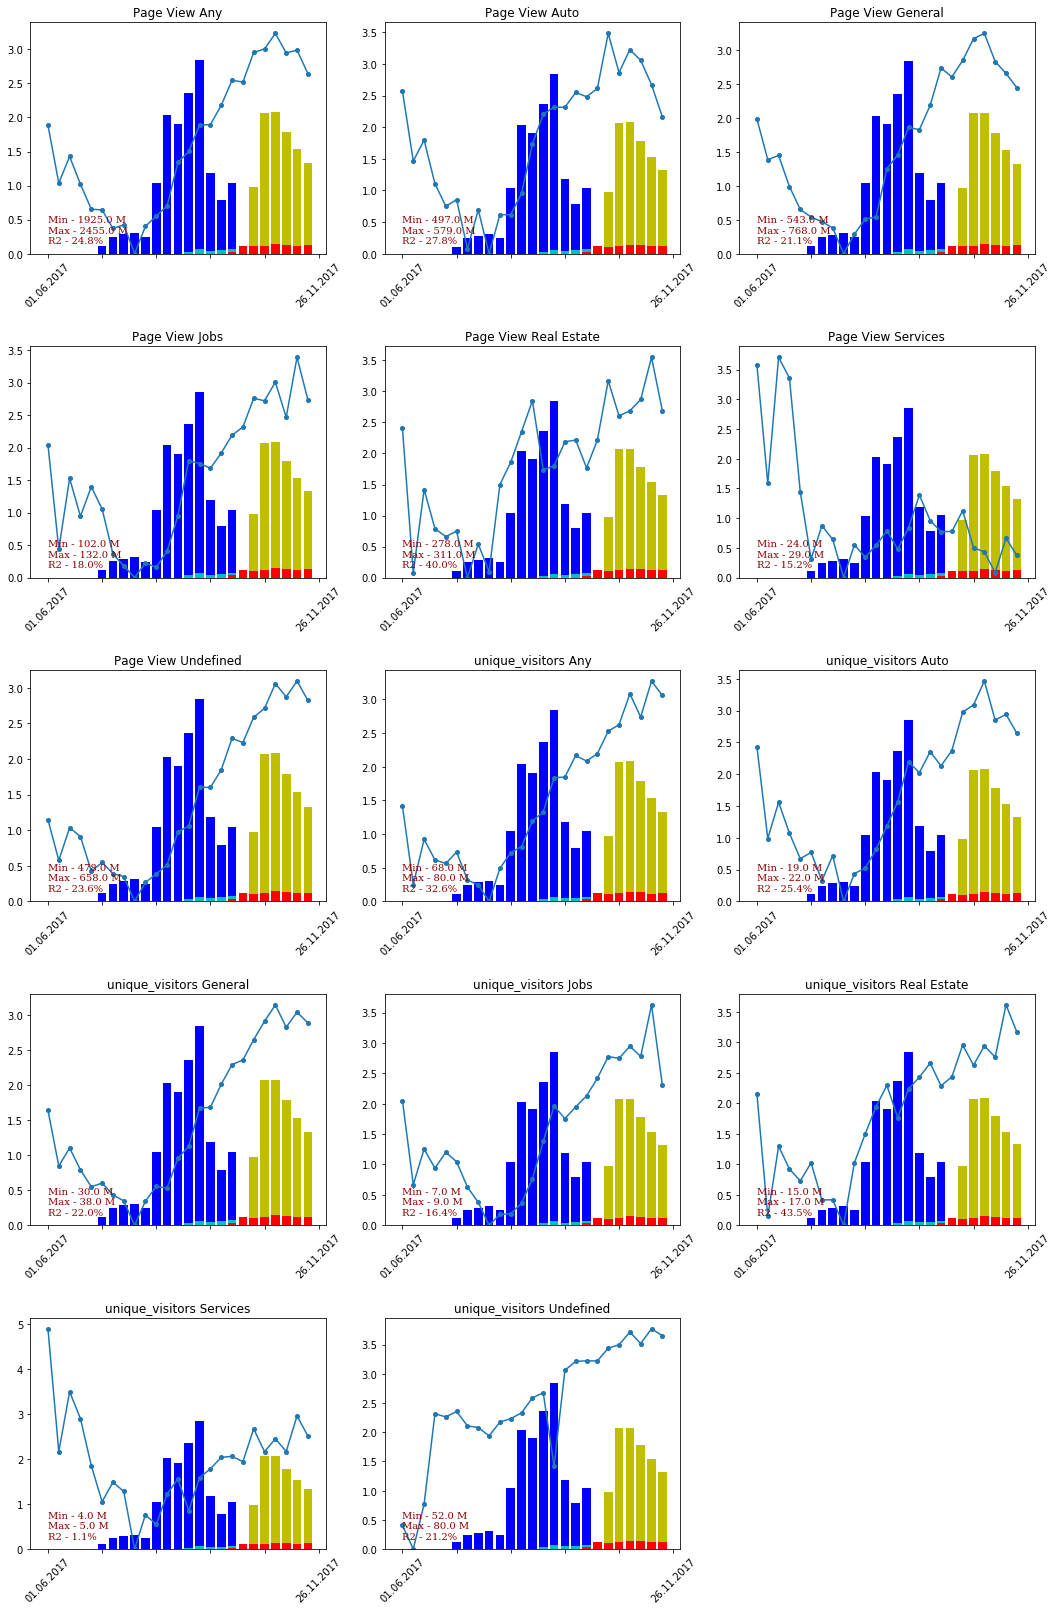

In [70]:
plt.close()
traffic_daily = pd.read_csv('./input/Traffic Daily.csv', sep = ';', decimal = ',')
traffic_daily['week_num'] = traffic_daily.index//7+1
traffic_daily_agg = traffic_daily.groupby(traffic_daily.columns[-1]).sum()
first_date = traffic_daily['Day of event_date'].iloc[0]
start_date = traffic_daily['Day of event_date'].iloc[-1]
index = 0
data = traffic_daily_agg
graph_num = data.shape[1]-1
excluding_fields = ['GRP Auto','GRP General','GRP Job','GRP Services','GRP Real estate / Site'
                    ,'Day of event_date','GRP','GRP30','week_num']
tv_metric_fields = ['GRP Auto','GRP General','GRP Job','GRP Services','GRP Real estate / Site']
metric_list = data.columns[data.columns.isin(excluding_fields)==False]
col_num = 3
figsize = (18.0, graph_num*2)
gs = gridspec.GridSpec(graph_num // col_num + 1, col_num)
gs.update(hspace=0.4)
fig1 = plt.figure(num=1, figsize=figsize)
ax = []
color_list = ['y','b','g','c','r']
tv_data = data['GRP'][:-1]
tv_data_corr = np.std(tv_data)
for metric in metric_list:
    y_data = data[metric][:-1]
    X_data = data['GRP'][:-1]
#     print(X_data.shape,y_data.shape)
    model = linear_model.LinearRegression()
    model.fit(X = X_data.values.reshape([-1,1]), y = y_data)
    r2 =(r2_score(y_data, model.predict(X_data.values.reshape([-1,1]))))
    
    row = (index // col_num)
    col = index % col_num
    plot_data = data[metric][:-1]
    min_plot = np.min(plot_data)
    max_plot = np.max(plot_data)
    plot_data = (plot_data-min_plot)/(np.std(plot_data))
    ax.append(fig1.add_subplot(gs[row, col]))
    ax[-1].set_title(metric)
    ax[-1].plot(range(len(plot_data)),plot_data,  'o', ls='-', ms=4)
#     ax[-1].plot(range(len(plot_data)),plot_data,  'o', ls='-', ms=4,co)
    col_index = 0
    color_list
    for tv_metric in tv_metric_fields:
        tv_data = data[tv_metric][:-1]
        tv_data /= tv_data_corr
        ax[-1].bar(range(len(tv_data)),tv_data,color = color_list[col_index])
        col_index+=1
#     ax[-1].axes.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax[-1].text(0, min(plot_data), str('Min - '+str(min_plot//1e6)+' M\nMax - '+str(max_plot//1e6)+' M\nR2 - '+f'{r2:.1%}'+'\n') , fontdict=font)
    index+=1
    labels = ([item.get_text() for item in ax[-1].axes.get_xticklabels()]).copy()
    labels[1] = first_date
    labels[-2] = start_date
    ax[-1].set_xticklabels(labels,minor=False, rotation=45)